## Un notebook realisé par le groupe 6 (Phenetic):
- Abid Moez
- Abidi Sarah
- Bousnina Iheb
- Bayoudh Fedi
- Dridi Mouna 
- Laajili Samar
- Thabti Montassar



In [11]:
#l'importation des packages necessaires 
from bs4 import BeautifulSoup as bsoup
import requests as rq
import re
import io
from nltk.tokenize import RegexpTokenizer
from nltk import word_tokenize
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.snowball import FrenchStemmer
from nltk.stem import WordNetLemmatizer 
from nltk import punkt
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import numpy as np
import pandas as pd


# 1) TrustPilot

# Web Scrapping 

In [3]:
#L'url de base 

base_url = 'https://fr.trustpilot.com/review/mcdonalds.fr'
r = rq.get(base_url)



soup = bsoup(r.text)

num_pages = 18

# ajouter dans url_liste l'ensemble des liens des pages pour faire le scrapping
url_list = ["{}?page={}".format(base_url, str(page)) for page in range(1, num_pages + 1)]

#enregistrer l'ensemble des codes des emojis 
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\u2600-\u26FF\u2700-\u27BF"
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
                           u"\U0001f92e"
                           "]+", flags=re.UNICODE)

x=''
i=0
j=0
liste_commentaire= [] 
liste_avis=[]
for url_ in url_list:
    print ("Processing {}...".format(url_))
    r_new = rq.get(url_)    
    soup_new = bsoup(r_new.content, 'html.parser')
    results = soup_new.find(class_="company-profile-body")
    job_elems = results.find_all('div', class_="review-content__body")
    job_elems2 = results.find_all('div', class_="star-rating star-rating--medium")
    for job_elem in job_elems2:
        liste_avis.append( "\n".join([img['alt'] for img in job_elem.find_all('img', alt=True)]).replace(" étoile :","").replace(" étoiles :",""))
        j=j+1
        
    for job_elem in job_elems:
        liste_commentaire.append([emoji_pattern.sub(r'',job_elem.text.lower()),liste_avis[i],i])#enlever les emojis  
        x=x+ emoji_pattern.sub(r'',job_elem.text.lower()  )
        i=i+1
    
       
        
#ouvrir le fichier pour ecrire les commentaire scrappé desous 
acct= io.open("C:\\Users\\Asus\\Desktop\\x1.txt", "w", encoding="utf-8")  
acct.write(x)

Processing https://fr.trustpilot.com/review/mcdonalds.fr?page=1...
Processing https://fr.trustpilot.com/review/mcdonalds.fr?page=2...
Processing https://fr.trustpilot.com/review/mcdonalds.fr?page=3...
Processing https://fr.trustpilot.com/review/mcdonalds.fr?page=4...
Processing https://fr.trustpilot.com/review/mcdonalds.fr?page=5...
Processing https://fr.trustpilot.com/review/mcdonalds.fr?page=6...
Processing https://fr.trustpilot.com/review/mcdonalds.fr?page=7...
Processing https://fr.trustpilot.com/review/mcdonalds.fr?page=8...
Processing https://fr.trustpilot.com/review/mcdonalds.fr?page=9...
Processing https://fr.trustpilot.com/review/mcdonalds.fr?page=10...
Processing https://fr.trustpilot.com/review/mcdonalds.fr?page=11...
Processing https://fr.trustpilot.com/review/mcdonalds.fr?page=12...
Processing https://fr.trustpilot.com/review/mcdonalds.fr?page=13...
Processing https://fr.trustpilot.com/review/mcdonalds.fr?page=14...
Processing https://fr.trustpilot.com/review/mcdonalds.fr?

131855

In [13]:
#la liste des ponctuations pour les enlevers plus tard 
punctuations = list(string.punctuation)
punctuations.append('’')
punctuations.append("''")
punctuations.append("…")
punctuations.append("'")
punctuations.append("-")
punctuations.append("🤣")
punctuations.append("🤔🤔🤔")
punctuations.append("🤢")
punctuations.append(".")

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [38]:
word_tokenize(x) ; 
final =  [i.strip("".join(punctuations)) for i in word_tokenize(x) if i not in punctuations] ;


#On créé notre set de stopwords final qui cumule ainsi les 100 mots les plus fréquents du corpus ainsi que l'ensemble de stopwords par défaut présent dans la librairie NLTK
sw = set()
sw.update(tuple(nltk.corpus.stopwords.words('french')))
sw


{'ai',
 'aie',
 'aient',
 'aies',
 'ait',
 'as',
 'au',
 'aura',
 'aurai',
 'auraient',
 'aurais',
 'aurait',
 'auras',
 'aurez',
 'auriez',
 'aurions',
 'aurons',
 'auront',
 'aux',
 'avaient',
 'avais',
 'avait',
 'avec',
 'avez',
 'aviez',
 'avions',
 'avons',
 'ayant',
 'ayante',
 'ayantes',
 'ayants',
 'ayez',
 'ayons',
 'c',
 'ce',
 'ces',
 'd',
 'dans',
 'de',
 'des',
 'du',
 'elle',
 'en',
 'es',
 'est',
 'et',
 'eu',
 'eue',
 'eues',
 'eurent',
 'eus',
 'eusse',
 'eussent',
 'eusses',
 'eussiez',
 'eussions',
 'eut',
 'eux',
 'eûmes',
 'eût',
 'eûtes',
 'furent',
 'fus',
 'fusse',
 'fussent',
 'fusses',
 'fussiez',
 'fussions',
 'fut',
 'fûmes',
 'fût',
 'fûtes',
 'il',
 'ils',
 'j',
 'je',
 'l',
 'la',
 'le',
 'les',
 'leur',
 'lui',
 'm',
 'ma',
 'mais',
 'me',
 'mes',
 'moi',
 'mon',
 'même',
 'n',
 'ne',
 'nos',
 'notre',
 'nous',
 'on',
 'ont',
 'ou',
 'par',
 'pas',
 'pour',
 'qu',
 'que',
 'qui',
 's',
 'sa',
 'se',
 'sera',
 'serai',
 'seraient',
 'serais',
 'serait',


In [39]:
  filtered_sentence =[]
for w in final: 
    if w not in sw : 
        filtered_sentence.append(w) 
print(filtered_sentence) 

['mcdonald', 'france', 'mcdonald', 'france', 'plupart', 'très', 'propres', 'service', 'rapide.le', 'prix', 'menus', 'augmente', 'légèrement', 'chaque', 'année', 'dommage', 'responsable', 'mc', 'do', 'hautain', 'bonjour', 'rendu', 'mc', 'do', 'centre', 'commercial', 'odysseum', 'montpellier', 'commandé', 'simple', 'salade', 'non', 'seulement', 'a', 'jamais', 'donnée', 'lorsque', 'allé', 'demandé', 'responsable', 'i', 'a', 'hautain.j', 'femme', 'enfant', 'peux', 'dire', 'chercherais', 'plus', 'rendre', 'mc', 'do', 'concurrence.que', 'dire', 'lorsque', 'demandé', 'remboursement', '', 'bref', 'corona', 'virus', 'corona', 'virus', 'macdonald', 'met', 'vie', 'salariés', 'danger', 'comme', 'si', 'macdonald', 'indispensable', 'vie', 'france', '', 'drive', 'ouvert', 'service', 'uber', 'ouvert', '', 'tout', 'ça', 'encore', 'fric', 'tant', 'pis', 'si', 'salariés', 'peuvent', 'rester', 'chez', 'peuvent', 'contaminer', 'entre', 'bravo', 'macdonald', 'ça', 'passe', 'comme', 'ça', 'chez', 'éviter', '

In [37]:
Stemmer = FrenchStemmer()
#'il n'existe pas de fonction de lemmatisation de corpus français dans NLTK
wordnet_lemmatizer = WordNetLemmatizer()
Finalsteem = []
print("{0:20}{1:20}".format("mot","steem"))
for w in filtered_sentence:       
    print("{0:20}{1:20}".format(w,Stemmer.stem(w)))
    Finalsteem.append(Stemmer.stem(w))    
   

mot                 steem               
mcdonald            mcdonald            
france              franc               
mcdonald            mcdonald            
france              franc               
plupart             plupart             
très                tres                
propres             propr               
service             servic              
rapide.le           rapide.l            
prix                prix                
menus               menus               
augmente            augment             
légèrement          léger               
chaque              chaqu               
année               anné                
dommage             dommag              
responsable         respons             
mc                  mc                  
do                  do                  
hautain             hautain             
bonjour             bonjour             
rendu               rendu               
mc                  mc                  
do              

### Assembler les etapes precedentes dans une fonction 


In [17]:
#Definition de la fonction preprocess 
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(Stemmer.stem(token))
    return result

In [4]:
df = pd.DataFrame(liste_commentaire, columns =['commentaire','avis' ,'index']) 
df

,commentaire,avis,index
0,\n\nles mcdonald's en france sont pour la…\n\n...,4 bien,0
1,\n\nresponsable mc do hautain\n\n\n ...,1 mauvais,1
2,\n\ncorona virus\n\n\n corona v...,1 mauvais,2
3,\n\néviter mcdo peipin\n\n\n at...,1 mauvais,3
4,\n\nmc do anet\n\n\n bonjour mc...,1 mauvais,4
...,...,...,...
337,\n\nmon fast-food préféré\n\n\n ...,4 bien,337
338,\n\ndegueulasse\n\n\n dégueulas...,1 mauvais,338
339,\n\ngenial a part les sodas\n\n\n ...,5 excellent,339
340,\n\npas toujours de glace\n\n\n ...,4 bien,340


In [18]:

processed_docs = df['commentaire'].map(preprocess)
processed_docsavis= df['avis'].map(preprocess)
processed_docsavis[0]


['bien']

In [19]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 anné
1 augment
2 chaqu
3 dommag
4 franc
5 léger
6 mcdonald
7 menus
8 plupart
9 pour
10 prix


In [20]:
dictionaryavis = gensim.corpora.Dictionary(processed_docsavis)
count = 0
for k, v in dictionaryavis.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 bien
1 mauv
2 moyen
3 excellent


In [ ]:
dictionary.filter_extremes(no_below=10, no_above=0.5, keep_n=100000)

In [26]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[0] 

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 2),
 (5, 1),
 (6, 2),
 (7, 1),
 (8, 1),
 (9, 2),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 2),
 (15, 1)]

In [24]:
bow_corpusavis = [dictionaryavis.doc2bow(doc1) for doc1 in processed_docsavis]
bow_corpusavis[8]

[(1, 1)]

In [ ]:
bow_doc_300 = bow_corpus[0]
for i in range(len(bow_doc_300)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_300[i][0], 
                                               dictionary[bow_doc_300[i][0]], 
bow_doc_300[i][0]))

Word 0 ("chaqu") appears 0 time.
Word 1 ("mcdonald") appears 1 time.
Word 2 ("menus") appears 2 time.
Word 3 ("pour") appears 3 time.
Word 4 ("prix") appears 4 time.
Word 5 ("rapid") appears 5 time.
Word 6 ("servic") appears 6 time.
Word 7 ("sont") appears 7 time.
Word 8 ("tres") appears 8 time.


In [22]:
bow_doc_3 = bow_corpusavis[1]
for i in range(len(bow_doc_3)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_3[i][0], 
                                               dictionaryavis[bow_doc_3[i][0]], 
bow_doc_3[i][0]))

Word 1 ("mauv") appears 1 time.


In [27]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.2673148931411435),
 (1, 0.2539060193653215),
 (2, 0.17368474167670275),
 (3, 0.22566312683440465),
 (4, 0.4513262536688093),
 (5, 0.3506184257546211),
 (6, 0.32440816057376015),
 (7, 0.18788953168033948),
 (8, 0.3506184257546211),
 (9, 0.09510998481475913),
 (10, 0.19203536829426598),
 (11, 0.23368713460100482),
 (12, 0.17693368407791837),
 (13, 0.12895072044510494),
 (14, 0.17919139453476177),
 (15, 0.1109171963929364)]


In [34]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [35]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic)) 

Topic: 0 
Words: 0.030*"pour" + 0.017*"plus" + 0.010*"tres" + 0.010*"mais" + 0.009*"command" + 0.008*"attent" + 0.008*"fait" + 0.007*"driv" + 0.007*"fois" + 0.007*"trop"
Topic: 1 
Words: 0.019*"couvercl" + 0.016*"command" + 0.013*"avec" + 0.012*"votr" + 0.011*"chez" + 0.009*"sont" + 0.009*"mid" + 0.009*"pour" + 0.007*"gobelet" + 0.007*"arrêt"
Topic: 2 
Words: 0.031*"plus" + 0.026*"couvercl" + 0.018*"gobelet" + 0.015*"dan" + 0.012*"boisson" + 0.011*"avec" + 0.010*"fois" + 0.009*"tres" + 0.009*"toujour" + 0.009*"pour"
Topic: 3 
Words: 0.018*"sont" + 0.017*"dan" + 0.015*"plus" + 0.014*"mcdo" + 0.009*"mang" + 0.009*"pour" + 0.009*"driv" + 0.009*"fois" + 0.008*"paill" + 0.007*"tout"
Topic: 4 
Words: 0.022*"pour" + 0.017*"vous" + 0.015*"dan" + 0.014*"tout" + 0.012*"mais" + 0.010*"nous" + 0.010*"plus" + 0.009*"command" + 0.008*"bien" + 0.007*"paill"
Topic: 5 
Words: 0.013*"pour" + 0.012*"sont" + 0.012*"boisson" + 0.012*"vous" + 0.011*"tres" + 0.010*"nouveau" + 0.009*"donald" + 0.009*"avec" + 

In [36]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=11, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic)) 

Topic: 0 Word: 0.005*"mang" + 0.004*"serv" + 0.004*"mcdo" + 0.003*"command" + 0.003*"poubel" + 0.003*"gobelet" + 0.003*"minut" + 0.003*"plus" + 0.003*"rien" + 0.003*"être"
Topic: 1 Word: 0.005*"gobelet" + 0.004*"tout" + 0.004*"nouveau" + 0.004*"tres" + 0.004*"couvercl" + 0.003*"sont" + 0.003*"emploi" + 0.003*"lent" + 0.003*"scandal" + 0.003*"carton"
Topic: 2 Word: 0.004*"driv" + 0.003*"fois" + 0.003*"revoir" + 0.003*"gobelet" + 0.003*"tres" + 0.003*"plus" + 0.003*"pour" + 0.003*"couvercl" + 0.003*"franch" + 0.003*"sérieux"
Topic: 3 Word: 0.004*"termin" + 0.003*"quand" + 0.003*"petit" + 0.003*"dan" + 0.003*"bacon" + 0.003*"plus" + 0.003*"rouen" + 0.003*"gâch" + 0.003*"pir" + 0.003*"sandwich"
Topic: 4 Word: 0.003*"arriv" + 0.003*"coc" + 0.003*"horribl" + 0.003*"plus" + 0.003*"gobelet" + 0.003*"boisson" + 0.003*"nouveau" + 0.003*"nous" + 0.003*"couvercl" + 0.003*"maison"
Topic: 5 Word: 0.006*"nous" + 0.004*"servic" + 0.003*"elle" + 0.003*"était" + 0.003*"command" + 0.003*"tres" + 0.003*"m

### on a trouvé 10topic : par exemple le topic numero 7 qui parle du sujet de la commande froide / topic 4 experience mauvaise dans le boisson etc 


In [ ]:
processed_docs[300]

['équip',
 'managérial',
 'deplor',
 'équip',
 'managérial',
 'deplor',
 'centr',
 'commercial',
 'équip',
 'souffranc',
 'san',
 'accompagn',
 'leur',
 'manag',
 'plus',
 'minut',
 'attent',
 'san',
 'mêm',
 'excus']

In [ ]:
for index, score in sorted(lda_model[bow_corpus[250]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.9437374472618103	 
Topic: 0.035*"dan" + 0.035*"vous" + 0.034*"pour" + 0.023*"tres" + 0.022*"froid" + 0.020*"plus" + 0.020*"avec" + 0.018*"trop" + 0.018*"command" + 0.016*"tout"


In [ ]:
for index, score in sorted(lda_model_tfidf[bow_corpus[300]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10))) 


Score: 0.7806578278541565	 
Topic: 0.042*"nous" + 0.020*"équip" + 0.018*"command" + 0.017*"somm" + 0.017*"tres" + 0.014*"serv" + 0.014*"avec" + 0.014*"tout" + 0.013*"demand" + 0.013*"donald"

Score: 0.1526632308959961	 
Topic: 0.017*"servic" + 0.015*"person" + 0.014*"sauc" + 0.014*"vous" + 0.013*"command" + 0.013*"avec" + 0.013*"restaur" + 0.013*"mang" + 0.013*"plus" + 0.012*"pass"


In [ ]:
unseen_document = 'How a Pentagon deal became an identity crisis for Google'
bow_vector = dictionary.doc2bow(preprocess("La nourriture était bonne. Le personnel était désagréablement désagréable! Sortie en famille complètement ruinée par un homme grossier, irrespectueux et désagréable À ÉVITER "))
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.8847700953483582	 Topic: 0.042*"dan" + 0.042*"boisson" + 0.039*"nouveau" + 0.034*"plus" + 0.028*"carton"
Score: 0.02630905993282795	 Topic: 0.035*"dan" + 0.035*"vous" + 0.034*"pour" + 0.023*"tres" + 0.022*"froid"
Score: 0.011116018518805504	 Topic: 0.043*"tout" + 0.042*"command" + 0.033*"pour" + 0.025*"dan" + 0.024*"san"
Score: 0.011115907691419125	 Topic: 0.049*"nous" + 0.038*"command" + 0.035*"plus" + 0.026*"pour" + 0.021*"restaur"
Score: 0.011115772649645805	 Topic: 0.051*"gobelet" + 0.036*"nouveau" + 0.035*"couvercl" + 0.033*"vous" + 0.029*"mais"
Score: 0.011115393601357937	 Topic: 0.052*"pour" + 0.033*"mais" + 0.029*"mcdonald" + 0.027*"sont" + 0.022*"froid"
Score: 0.011114750057458878	 Topic: 0.068*"plus" + 0.066*"pour" + 0.039*"fois" + 0.033*"mais" + 0.024*"tout"
Score: 0.01111468393355608	 Topic: 0.043*"vrai" + 0.034*"sont" + 0.032*"nous" + 0.027*"tout" + 0.023*"plus"
Score: 0.01111459918320179	 Topic: 0.044*"nouveau" + 0.043*"gobelet" + 0.042*"plus" + 0.032*"sont" + 0.

# 2) TripAdvisor

In [ ]:
import requests

URL = 'https://www.tripadvisor.fr/Restaurant_Review-g226865-d4068473-Reviews-McDonald_s-Marne_la_Vallee_Seine_et_Marne_Ile_de_France.html'
page = requests.get(URL)


In [ ]:
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
soup = BeautifulSoup(page.content, 'html.parser')


In [ ]:
results = soup.find(id='taplc_location_reviews_list_resp_rr_resp_0')


In [ ]:
reviews_Trip = results.find_all('p', class_='partial_entry')


In [ ]:
for x in range(1, 26):
    URL = 'https://www.tripadvisor.fr/Restaurant_Review-g226865-d4068473-Reviews-or'+str(x)+'0-McDonald_s-Marne_la_Vallee_Seine_et_Marne_Ile_de_France.html'
    page = requests.get(URL)
    soup = BeautifulSoup(page.content, 'html.parser')
    results = soup.find(id='taplc_location_reviews_list_resp_rr_resp_0')
    reviews_Trip=reviews_Trip+results.find_all('p', class_='partial_entry')

In [ ]:
for review_T in reviews_Trip:
    print(review_T, end='\n'*2)


<p class="partial_entry">Déplorable déplorable déplorable pire service que je connu. Les salariés sont pas gentils et je reste sans commande après paye le personnel dis que quelqu'un pris ma commande</p>

<p class="partial_entry">l'un des points de restauration rapides le moins cher mais c'est tout, énormément de monde et peu de place
un mac do quoi</p>

<p class="partial_entry">je ne comprends pas les avis négatifs ! On est dans un Mac do pas dans un resto 4 étoiles!  Le personnel est sympatique et l'endroit agréable. Au niveau rapport qualité-prix c'est parfait pour un fastfood ! Manger dans le parc coûte une fortune même...<span class="taLnk ulBlueLinks" onclick="widgetEvCall('handlers.clickExpand',event,this);">Plus</span></p>

<p class="partial_entry">Bonsoir commande borne n 80 ils ont servi jusqu'au 95 en m'affirmant tout détendu que c'était normal. Il a fallu l'intervention d'un responsable pour qu'il remarque qu'en effet ils avaient oublié ma commande et que c'était leur faute

In [ ]:
for review_T in reviews_Trip:   
    print(review_T.text.strip())   
    print()


Déplorable déplorable déplorable pire service que je connu. Les salariés sont pas gentils et je reste sans commande après paye le personnel dis que quelqu'un pris ma commande

l'un des points de restauration rapides le moins cher mais c'est tout, énormément de monde et peu de place
un mac do quoi

je ne comprends pas les avis négatifs ! On est dans un Mac do pas dans un resto 4 étoiles!  Le personnel est sympatique et l'endroit agréable. Au niveau rapport qualité-prix c'est parfait pour un fastfood ! Manger dans le parc coûte une fortune même...Plus

Bonsoir commande borne n 80 ils ont servi jusqu'au 95 en m'affirmant tout détendu que c'était normal. Il a fallu l'intervention d'un responsable pour qu'il remarque qu'en effet ils avaient oublié ma commande et que c'était leur faute. Manque les sauces de nouveau retour au...Plus

L'enseigne Mc Donald's est connue par beaucoup de personnes. Ce n'est pas de la restauration de 1er choix en terme de qualité mais cela convient très bien pour u

In [ ]:
import pandas as pd
df_Trip = pd.DataFrame({'reviews':reviews_Trip,'index':0}) 
for ind in df.index: 
    df_Trip['reviews'][ind]=df_Trip['reviews'][ind].text.strip()
    df_Trip['index'][ind]=ind

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


KeyError: ignored

In [ ]:
df_Trip

,reviews,index
0,Déplorable déplorable déplorable pire service ...,0
1,l'un des points de restauration rapides le moi...,1
2,je ne comprends pas les avis négatifs ! On est...,2
3,Bonsoir commande borne n 80 ils ont servi jusq...,3
4,L'enseigne Mc Donald's est connue par beaucoup...,4
...,...,...
255,Joliment décorée à l'intérieur et la nourritur...,255
256,Nous y avons mangé sur notre première journée ...,256
257,La nourriture est identique dans tous les pays...,257
258,Je suis le ventilateur McDonald's et c'était l...,258


In [ ]:
df_Trip.to_csv('review.csv', index=False, encoding='utf-8') 
        

In [ ]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(Stemmer.stem(token))
    return result

In [ ]:
processed_docs_trip = df_Trip['reviews'].map(preprocess)
processed_docs_trip[0]

['déplor',
 'déplor',
 'déplor',
 'pir',
 'servic',
 'connu',
 'salari',
 'sont',
 'gentil',
 'rest',
 'san',
 'command',
 'apres',
 'pay',
 'personnel',
 'quelqu',
 'pris',
 'command']

In [ ]:
dictionary_trip = gensim.corpora.Dictionary(processed_docs_trip)
count = 0
for k, v in dictionary_trip.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 apres
1 command
2 connu
3 déplor
4 gentil
5 pay
6 personnel
7 pir
8 pris
9 quelqu
10 rest


In [ ]:
dictionary_trip.filter_extremes(no_below=10, no_above=0.5, keep_n=100000)

In [ ]:
bow_corpus_trip = [dictionary_trip.doc2bow(doc) for doc in processed_docs_trip]
bow_corpus_trip[0] 

[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]

In [ ]:
bow_doc_300_trip = bow_corpus_trip[0]
for i in range(len(bow_doc_300_trip)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_300_trip[i][0], 
                                               dictionary[bow_doc_300_trip[i][0]], 
bow_doc_300_trip[i][0]))

Word 0 ("chaqu") appears 0 time.
Word 1 ("mcdonald") appears 1 time.
Word 2 ("menus") appears 2 time.
Word 3 ("pour") appears 3 time.
Word 4 ("prix") appears 4 time.
Word 5 ("rapid") appears 5 time.
Word 6 ("servic") appears 6 time.
Word 7 ("sont") appears 7 time.
Word 8 ("tres") appears 8 time.


In [ ]:
from gensim import corpora, models
tfidf_trip = models.TfidfModel(bow_corpus_trip)
corpus_tfidf_trip = tfidf_trip[bow_corpus_trip]
from pprint import pprint
for doc in corpus_tfidf_trip:
    pprint(doc)
    break

[(0, 0.33410252316026456),
 (1, 0.43030838044667297),
 (2, 0.21515419022333648),
 (3, 0.40527447100855296),
 (4, 0.3771841992362952),
 (5, 0.2967298773915953),
 (6, 0.3771841992362952),
 (7, 0.24344095286812523),
 (8, 0.24662425131394097)]


In [ ]:
lda_model_trip = gensim.models.LdaMulticore(bow_corpus_trip, num_topics=10, id2word=dictionary_trip, passes=2, workers=2)

In [ ]:
for idx, topic in lda_model_trip.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.049*"pour" + 0.036*"dan" + 0.034*"rapid" + 0.032*"nous" + 0.029*"assez" + 0.027*"command" + 0.025*"personnel" + 0.024*"attent" + 0.023*"cher" + 0.022*"était"
Topic: 1 
Words: 0.053*"pour" + 0.043*"dan" + 0.033*"vous" + 0.030*"tres" + 0.029*"nous" + 0.026*"restaur" + 0.023*"prix" + 0.021*"était" + 0.020*"tout" + 0.020*"autr"
Topic: 2 
Words: 0.067*"restaur" + 0.040*"fast" + 0.038*"attent" + 0.037*"dan" + 0.035*"vrai" + 0.034*"mais" + 0.030*"mond" + 0.028*"food" + 0.028*"pour" + 0.027*"heur"
Topic: 3 
Words: 0.053*"bien" + 0.047*"cher" + 0.043*"macdo" + 0.038*"mais" + 0.036*"disney" + 0.034*"pour" + 0.029*"dan" + 0.026*"comm" + 0.025*"tres" + 0.023*"moin"
Topic: 4 
Words: 0.084*"nous" + 0.041*"pour" + 0.037*"avon" + 0.031*"était" + 0.027*"vous" + 0.027*"born" + 0.022*"command" + 0.019*"dan" + 0.019*"tres" + 0.018*"attent"
Topic: 5 
Words: 0.060*"mais" + 0.043*"mond" + 0.043*"tout" + 0.040*"franc" + 0.037*"propos" + 0.035*"macdo" + 0.035*"manqu" + 0.028*"restaur" + 0.02

In [ ]:
lda_model_tfidf_trip = gensim.models.LdaMulticore(corpus_tfidf_trip, num_topics=10, id2word=dictionary_trip, passes=2, workers=4)
for idx, topic in lda_model_tfidf_trip.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic)) 

Topic: 0 Word: 0.021*"mang" + 0.020*"vous" + 0.019*"tres" + 0.019*"parc" + 0.018*"cher" + 0.018*"nous" + 0.018*"prix" + 0.016*"moin" + 0.015*"autr" + 0.015*"restaur"
Topic: 1 Word: 0.034*"command" + 0.026*"tabl" + 0.025*"mêm" + 0.024*"queu" + 0.021*"donald" + 0.021*"tres" + 0.021*"attent" + 0.019*"servic" + 0.018*"born" + 0.018*"pass"
Topic: 2 Word: 0.035*"ailleur" + 0.026*"rien" + 0.023*"mond" + 0.022*"rapid" + 0.021*"froid" + 0.021*"san" + 0.021*"parl" + 0.019*"pour" + 0.019*"moyen" + 0.018*"restaur"
Topic: 3 Word: 0.033*"mais" + 0.031*"trop" + 0.029*"mond" + 0.025*"parc" + 0.023*"vous" + 0.023*"cher" + 0.022*"avec" + 0.021*"pour" + 0.019*"attent" + 0.017*"vrai"
Topic: 4 Word: 0.034*"manqu" + 0.025*"beaucoup" + 0.024*"assez" + 0.024*"était" + 0.020*"mais" + 0.018*"command" + 0.017*"parl" + 0.017*"tous" + 0.017*"pour" + 0.016*"propos"
Topic: 5 Word: 0.031*"nous" + 0.026*"vous" + 0.023*"étaient" + 0.020*"notr" + 0.020*"avon" + 0.019*"était" + 0.018*"avoir" + 0.018*"tout" + 0.017*"avec"

In [ ]:
processed_docs_trip[30]

['mais',
 'patron',
 'inadmissibl',
 'attent',
 'pour',
 'quelqu',
 'glac',
 'bas',
 'sens',
 'être',
 'fast',
 'food',
 'donc',
 'servent',
 'nourritur',
 'rapid',
 'jam',
 'refair',
 'emploi',
 'sont',
 'trop',
 'lent',
 'déçu']

In [ ]:
for index, score in sorted(lda_model[bow_corpus_trip[200]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_trip.print_topic(index, 10)))


Score: 0.3762640953063965	 
Topic: 0.053*"bien" + 0.047*"cher" + 0.043*"macdo" + 0.038*"mais" + 0.036*"disney" + 0.034*"pour" + 0.029*"dan" + 0.026*"comm" + 0.025*"tres" + 0.023*"moin"

Score: 0.2815239131450653	 
Topic: 0.055*"mang" + 0.046*"mais" + 0.034*"pour" + 0.031*"sont" + 0.029*"vous" + 0.024*"autr" + 0.023*"rapid" + 0.021*"être" + 0.020*"dan" + 0.019*"cher"

Score: 0.18707534670829773	 
Topic: 0.049*"pour" + 0.036*"dan" + 0.034*"rapid" + 0.032*"nous" + 0.029*"assez" + 0.027*"command" + 0.025*"personnel" + 0.024*"attent" + 0.023*"cher" + 0.022*"était"

Score: 0.11983092874288559	 
Topic: 0.060*"mais" + 0.043*"mond" + 0.043*"tout" + 0.040*"franc" + 0.037*"propos" + 0.035*"macdo" + 0.035*"manqu" + 0.028*"restaur" + 0.028*"point" + 0.027*"plac"


In [ ]:
for index, score in sorted(lda_model_tfidf_trip[bow_corpus_trip[200]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf_trip.print_topic(index, 10))) 


Score: 0.5217413902282715	 
Topic: 0.028*"nous" + 0.023*"rapid" + 0.019*"contr" + 0.019*"comm" + 0.019*"propr" + 0.017*"arriv" + 0.016*"servic" + 0.016*"disney" + 0.015*"pour" + 0.015*"visit"

Score: 0.3802454471588135	 
Topic: 0.021*"mang" + 0.020*"vous" + 0.019*"tres" + 0.019*"parc" + 0.018*"cher" + 0.018*"nous" + 0.018*"prix" + 0.016*"moin" + 0.015*"autr" + 0.015*"restaur"

Score: 0.05682234466075897	 
Topic: 0.035*"ailleur" + 0.026*"rien" + 0.023*"mond" + 0.022*"rapid" + 0.021*"froid" + 0.021*"san" + 0.021*"parl" + 0.019*"pour" + 0.019*"moyen" + 0.018*"restaur"


In [ ]:
unseen_document = 'How a Pentagon deal became an identity crisis for Google'
bow_vector_trip = dictionary_trip.doc2bow(preprocess("La nourriture était bonne. Le personnel était désagréablement désagréable! Sortie en famille complètement ruinée par un homme grossier, irrespectueux et désagréable À ÉVITER "))
for index, score in sorted(lda_model_trip[bow_vector_trip], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model_trip.print_topic(index, 5)))

Score: 0.5322373509407043	 Topic: 0.073*"tres" + 0.047*"mais" + 0.042*"mond" + 0.037*"dan" + 0.034*"était"
Score: 0.35345157980918884	 Topic: 0.049*"pour" + 0.036*"dan" + 0.034*"rapid" + 0.032*"nous" + 0.029*"assez"
Score: 0.014292572624981403	 Topic: 0.067*"restaur" + 0.040*"fast" + 0.038*"attent" + 0.037*"dan" + 0.035*"vrai"
Score: 0.014291116036474705	 Topic: 0.053*"pour" + 0.043*"dan" + 0.033*"vous" + 0.030*"tres" + 0.029*"nous"
Score: 0.014289965853095055	 Topic: 0.078*"pour" + 0.044*"nous" + 0.034*"parc" + 0.025*"avon" + 0.025*"command"
Score: 0.014289671555161476	 Topic: 0.055*"mang" + 0.046*"mais" + 0.034*"pour" + 0.031*"sont" + 0.029*"vous"
Score: 0.014288224279880524	 Topic: 0.084*"nous" + 0.041*"pour" + 0.037*"avon" + 0.031*"était" + 0.027*"vous"
Score: 0.014287116006016731	 Topic: 0.051*"vous" + 0.044*"attent" + 0.039*"mais" + 0.038*"pour" + 0.037*"avec"
Score: 0.014286680147051811	 Topic: 0.053*"bien" + 0.047*"cher" + 0.043*"macdo" + 0.038*"mais" + 0.036*"disney"
Score: 0.

# 3) Twitter

In [1]:
import sys,tweepy,csv,re
from textblob import TextBlob
import matplotlib.pyplot as plt

In [2]:
import sys,tweepy,csv,re
from textblob import TextBlob
import matplotlib.pyplot as plt


class SentimentAnalysis:

    def __init__(self):
        self.tweets = []
        self.tweetText = []

    def DownloadData(self):
        # authenticating
        #Twitter API credentials

        consumerKey = 'tiVIII7j3O9bPAbRgdJWmoJWd'
        consumerSecret = 'SR5KZuyzFgXkXvd0tADD8qFDfYzQ0mXBaTTvgDq0SagnHlWLEU'
        accessToken = '490394724-yTbJ770PfbqAqdiejo8IfEEKkIKTTtmTNodZI0ru'
        accessTokenSecret = '3qouPTCCnp6t1tfV6NjcXbJ4ulQ4wJ5WQt9QZzwURuTGo'


        auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
        auth.set_access_token(accessToken, accessTokenSecret)
        api = tweepy.API(auth)

        # input for term to be searched and how many tweets to search
        searchTerm = input("Enter Keyword/Tag to search about: ")
        NoOfTerms = int(input("Enter how many tweets to search: "))

        # searching for tweets
        self.tweets = tweepy.Cursor(api.search, q=searchTerm, lang = "fr").items(NoOfTerms)

        # Open/create a file to append data to
        csvFile = open('result.csv', 'a')

        # Use csv writer
        csvWriter = csv.writer(csvFile)


        # creating some variables to store info
        polarity = 0
        positive = 0
        wpositive = 0
        spositive = 0
        negative = 0
        wnegative = 0
        snegative = 0
        neutral = 0


        # iterating through tweets fetched
        for tweet in self.tweets:
            #Append to temp so that we can store in csv later. I use encode UTF-8
            self.tweetText.append(self.cleanTweet(tweet.text).encode('utf-8'))
            # print (tweet.text.translate(non_bmp_map))    #print tweet's text
            analysis = TextBlob(tweet.text)
            # print(analysis.sentiment)  # print tweet's polarity
            polarity += analysis.sentiment.polarity  # adding up polarities to find the average later

            if (analysis.sentiment.polarity == 0):  # adding reaction of how people are reacting to find average later
                neutral += 1
            elif (analysis.sentiment.polarity > 0 and analysis.sentiment.polarity <= 0.3):
                wpositive += 1
            elif (analysis.sentiment.polarity > 0.3 and analysis.sentiment.polarity <= 0.6):
                positive += 1
            elif (analysis.sentiment.polarity > 0.6 and analysis.sentiment.polarity <= 1):
                spositive += 1
            elif (analysis.sentiment.polarity > -0.3 and analysis.sentiment.polarity <= 0):
                wnegative += 1
            elif (analysis.sentiment.polarity > -0.6 and analysis.sentiment.polarity <= -0.3):
                negative += 1
            elif (analysis.sentiment.polarity > -1 and analysis.sentiment.polarity <= -0.6):
                snegative += 1


        # Write to csv and close csv file
        csvWriter.writerow(self.tweetText)
        csvFile.close()

        # finding average of how people are reacting
        positive = self.percentage(positive, NoOfTerms)
        wpositive = self.percentage(wpositive, NoOfTerms)
        spositive = self.percentage(spositive, NoOfTerms)
        negative = self.percentage(negative, NoOfTerms)
        wnegative = self.percentage(wnegative, NoOfTerms)
        snegative = self.percentage(snegative, NoOfTerms)
        neutral = self.percentage(neutral, NoOfTerms)

        # finding average reaction
        polarity = polarity / NoOfTerms

        # printing out data
        print("How people are reacting on " + searchTerm + " by analyzing " + str(NoOfTerms) + " tweets.")
        print()
        print("General Report: ")

        if (polarity == 0):
            print("Neutral")
        elif (polarity > 0 and polarity <= 0.3):
            print("Weakly Positive")
        elif (polarity > 0.3 and polarity <= 0.6):
            print("Positive")
        elif (polarity > 0.6 and polarity <= 1):
            print("Strongly Positive")
        elif (polarity > -0.3 and polarity <= 0):
            print("Weakly Negative")
        elif (polarity > -0.6 and polarity <= -0.3):
            print("Negative")
        elif (polarity > -1 and polarity <= -0.6):
            print("Strongly Negative")

        print()
        print("Detailed Report: ")
        print(str(positive) + "% people thought it was positive")
        print(str(wpositive) + "% people thought it was weakly positive")
        print(str(spositive) + "% people thought it was strongly positive")
        print(str(negative) + "% people thought it was negative")
        print(str(wnegative) + "% people thought it was weakly negative")
        print(str(snegative) + "% people thought it was strongly negative")
        print(str(neutral) + "% people thought it was neutral")

        self.plotPieChart(positive, wpositive, spositive, negative, wnegative, snegative, neutral, searchTerm, NoOfTerms)


    def cleanTweet(self, tweet):
        # Remove Links, Special Characters etc from tweet
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) | (\w +:\ / \ / \S +)", " ", tweet).split())

    # function to calculate percentage
    def percentage(self, part, whole):
        temp = 100 * float(part) / float(whole)
        return format(temp, '.2f')

    def plotPieChart(self, positive, wpositive, spositive, negative, wnegative, snegative, neutral, searchTerm, noOfSearchTerms):
        labels = ['Positive [' + str(positive) + '%]', 'Weakly Positive [' + str(wpositive) + '%]','Strongly Positive [' + str(spositive) + '%]', 'Neutral [' + str(neutral) + '%]',
                  'Negative [' + str(negative) + '%]', 'Weakly Negative [' + str(wnegative) + '%]', 'Strongly Negative [' + str(snegative) + '%]']
        sizes = [positive, wpositive, spositive, neutral, negative, wnegative, snegative]
        colors = ['yellowgreen','lightgreen','darkgreen', 'gold', 'red','lightsalmon','darkred']
        patches, texts = plt.pie(sizes, colors=colors, startangle=90)
        plt.legend(patches, labels, loc="best")
        plt.title('How people are reacting on ' + searchTerm + ' by analyzing ' + str(noOfSearchTerms) + ' Tweets.')
        plt.axis('equal')
        plt.tight_layout()
        plt.show()

Enter Keyword/Tag to search about:  Mcdonald's france
Enter how many tweets to search:  100


How people are reacting on Mcdonald's france by analyzing 100 tweets.

General Report: 
Weakly Negative

Detailed Report: 
0.00% people thought it was positive
0.00% people thought it was weakly positive
0.00% people thought it was strongly positive
0.00% people thought it was negative
4.00% people thought it was weakly negative
0.00% people thought it was strongly negative
96.00% people thought it was neutral


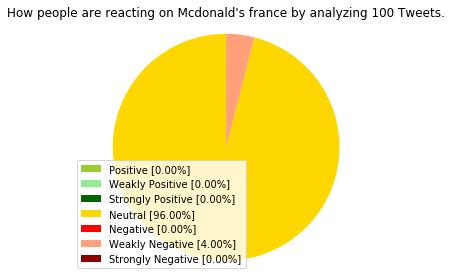

In [3]:
objet = SentimentAnalysis()
objet.DownloadData()

#### Interprétation :
- On remarque que la majorité des consommateurs de Mcdonald's ont un avis objectif concernant les sevices offerts par cette chaine de restauration,ils ne portent en aucun cas un jugement ,tandis qu'une minorité exprime son mecontentement.
- Ainsi à travers l'analyse des mots les plus utilisés dans les dictionnaires  générés on a pu constaté  le positionnement  de la marque dans le marché où la majorité montre une insatisfaction totale du service ce qui peut endommager plus au moins la e-reputation  de Macdonalds france . Ceci n'empêche pas l'existence de quelques mots positifs mais avec une faible fréquence  du coup une faible influence. Pour conclure avec les analyses faites, cette dernière doit revisiter sa stratégie afin de marquer sa place.